In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#upload dataset
bdata = pd.read_csv('Breastcancer.csv')  
bdata.head()
                

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [4]:
## 1. DATA ANALYSIS
#import dataset UCI Machine Learning "Breast-Cancer"
columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 
           'irradiat']
bdata = pd.read_csv('Breastcancer.csv', names = columns, header = None, skipinitialspace=True)
len(bdata)


286

In [5]:
bdata.head()                                                                                                            

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [6]:
# Cek Informasi Data Tiap Label
print(bdata.info())
print('Jumlah Dataset :', len(bdata))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB
None
Jumlah Dataset : 286


In [7]:
#Menghitung Frekuensi Kelas Target
bdata['irradiat'].value_counts()

no     218
yes     68
Name: irradiat, dtype: int64

In [8]:
# Summary Statistics
bdata.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [9]:
bdata.corr()

,deg-malig
deg-malig,1.0


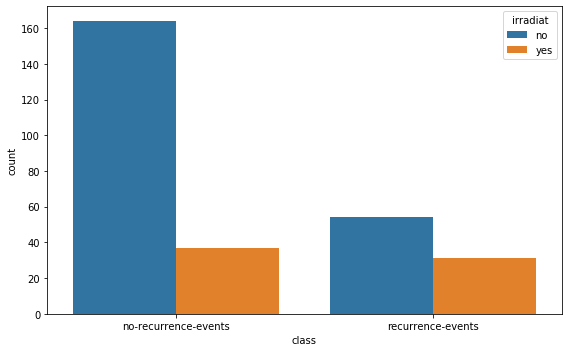

In [10]:
#Visualisasi Data
#untuk mempresentasikan data yang terstruktur ataupun tidak dengan grafik atau bagan untuk menampilkan info yang tersembunyi didalam data.
fig = plt.figure(figsize=(8,5))
sns.countplot('class', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

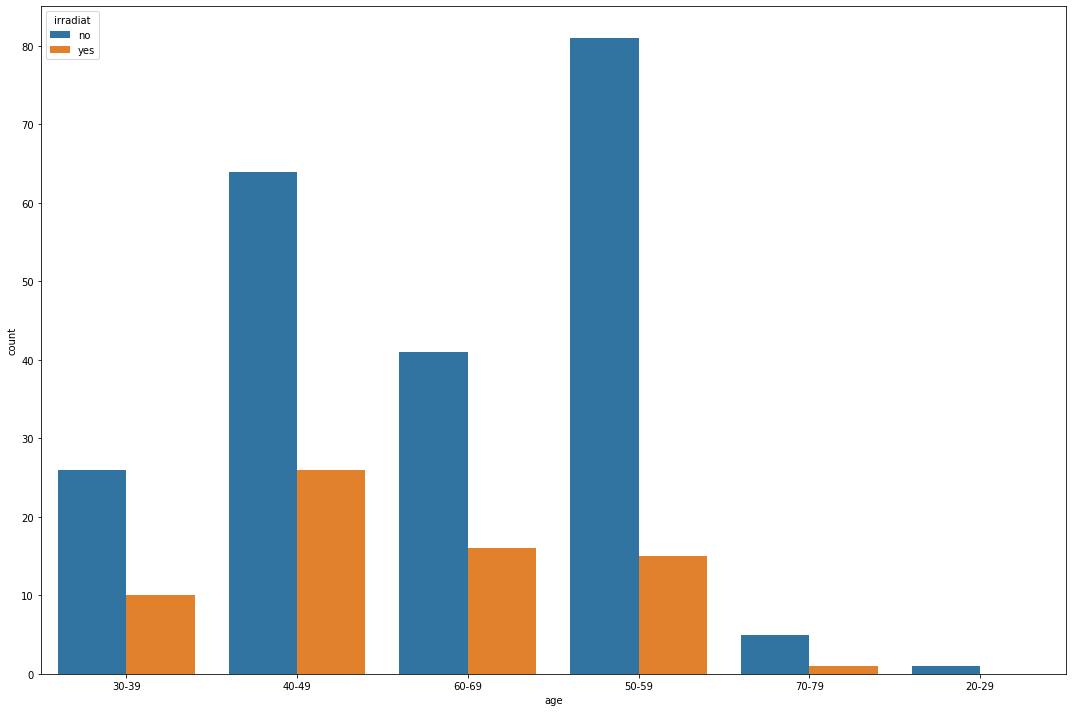

In [11]:
fig = plt.figure(figsize=(15,10))
sns.countplot('age', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

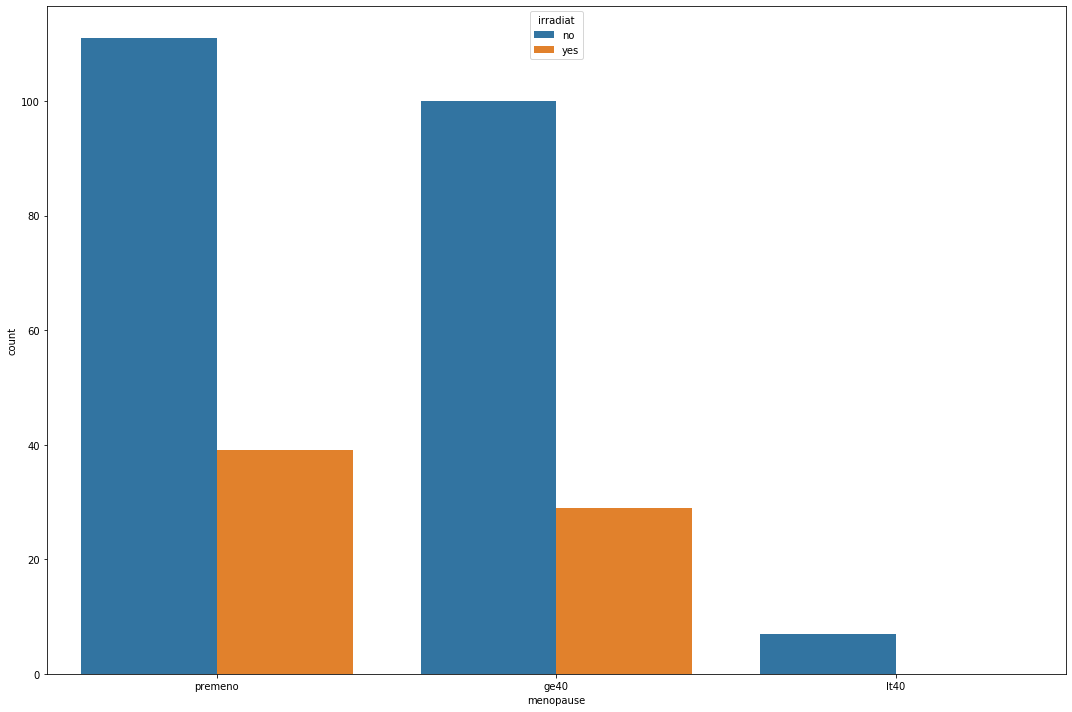

In [12]:
fig = plt.figure(figsize=(15,10))
sns.countplot('menopause', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

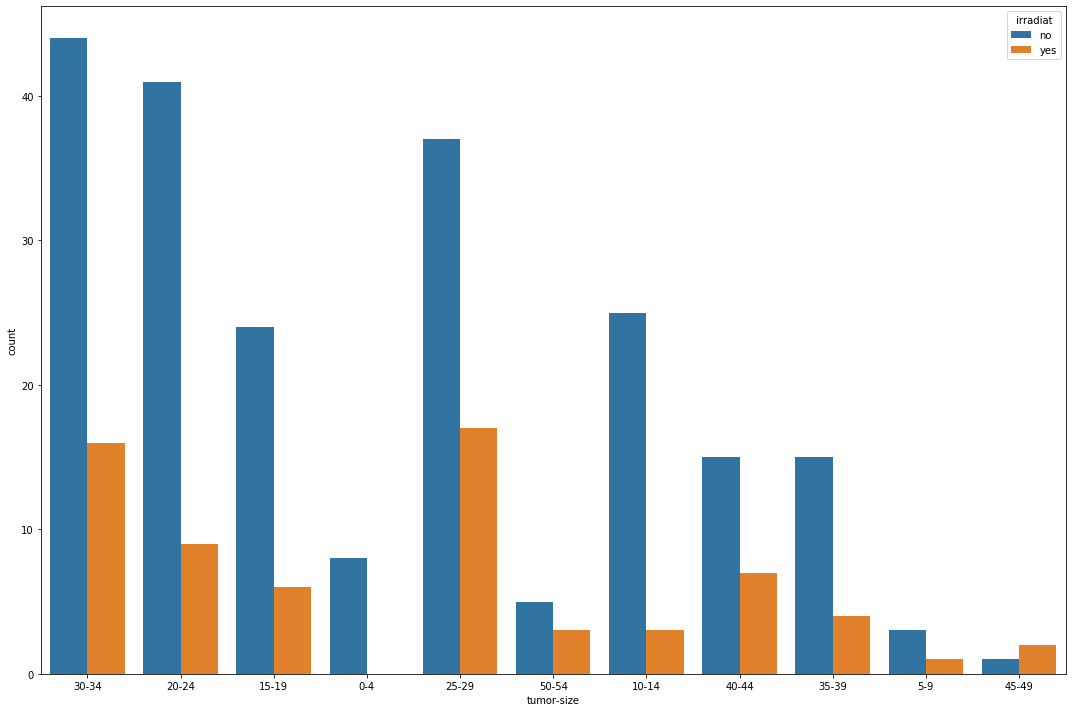

In [13]:
fig = plt.figure(figsize=(15,10))
sns.countplot('tumor-size', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

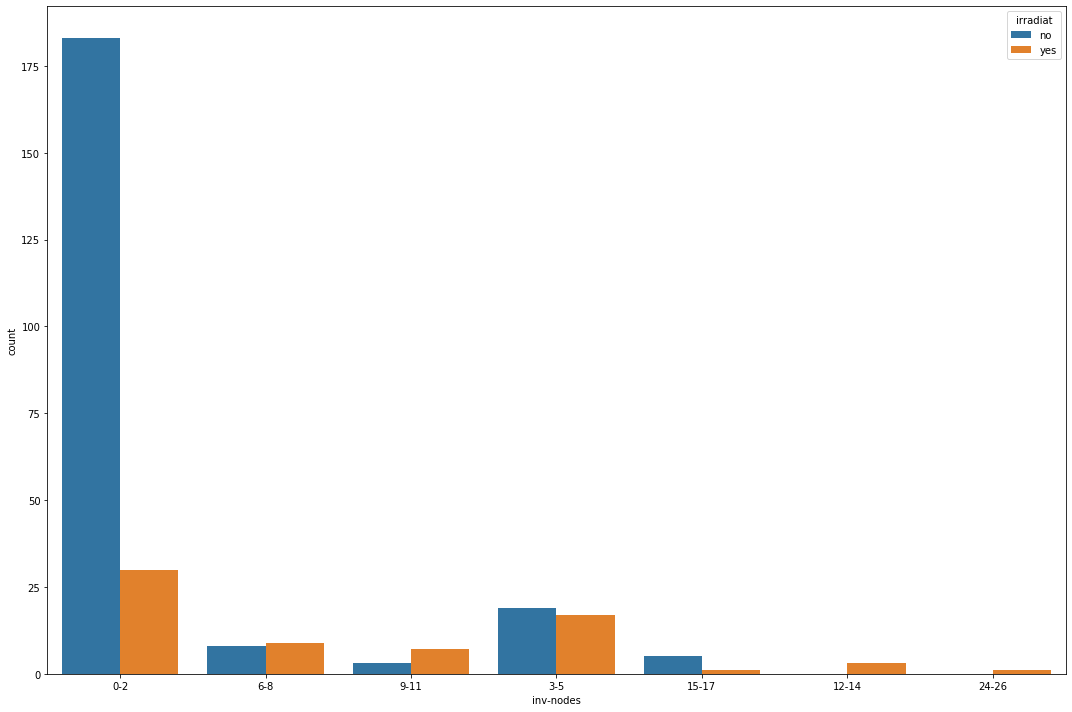

In [14]:
fig = plt.figure(figsize=(15,10))
sns.countplot('inv-nodes', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

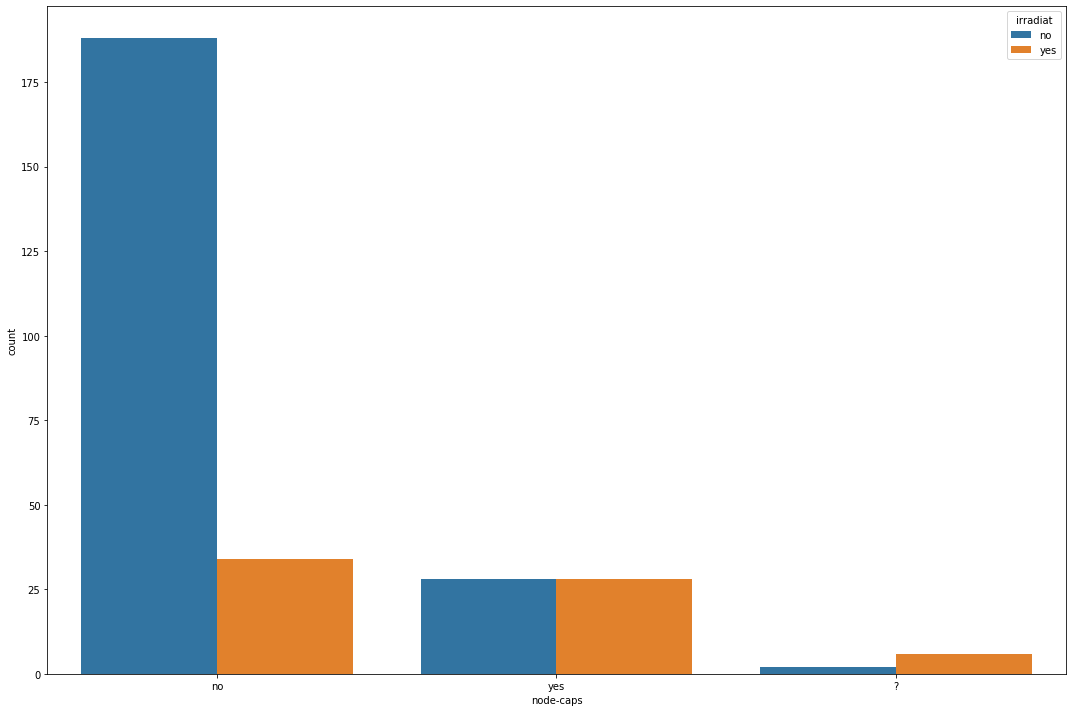

In [15]:
fig = plt.figure(figsize=(15,10))
sns.countplot('node-caps', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

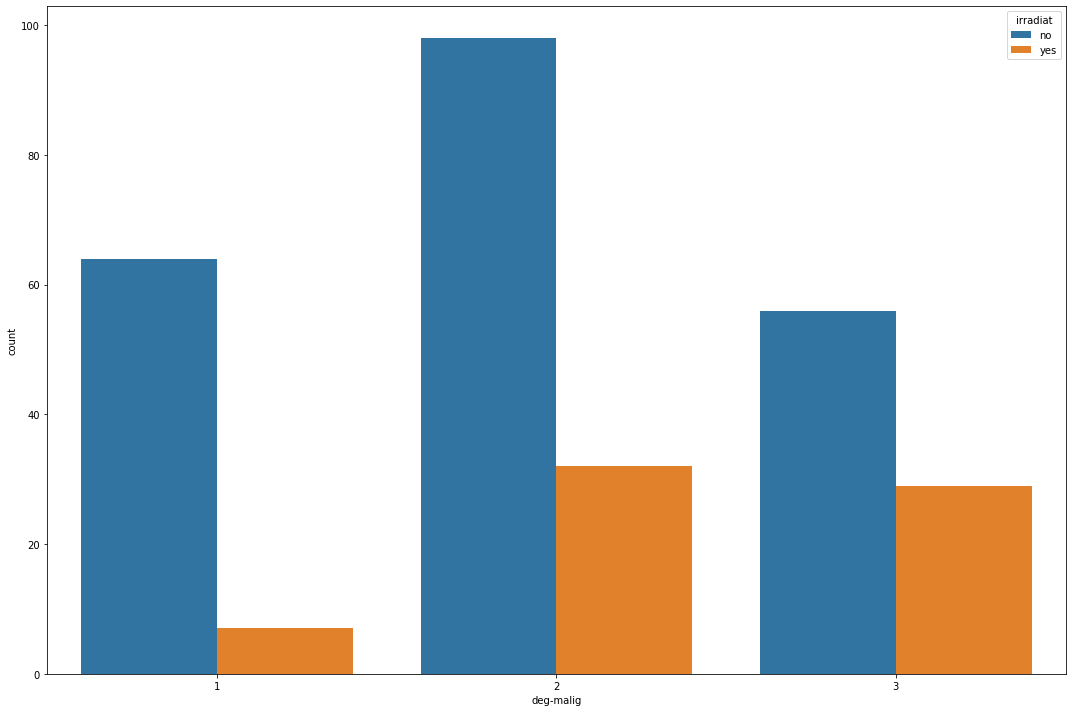

In [16]:
fig = plt.figure(figsize=(15,10))
sns.countplot('deg-malig', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

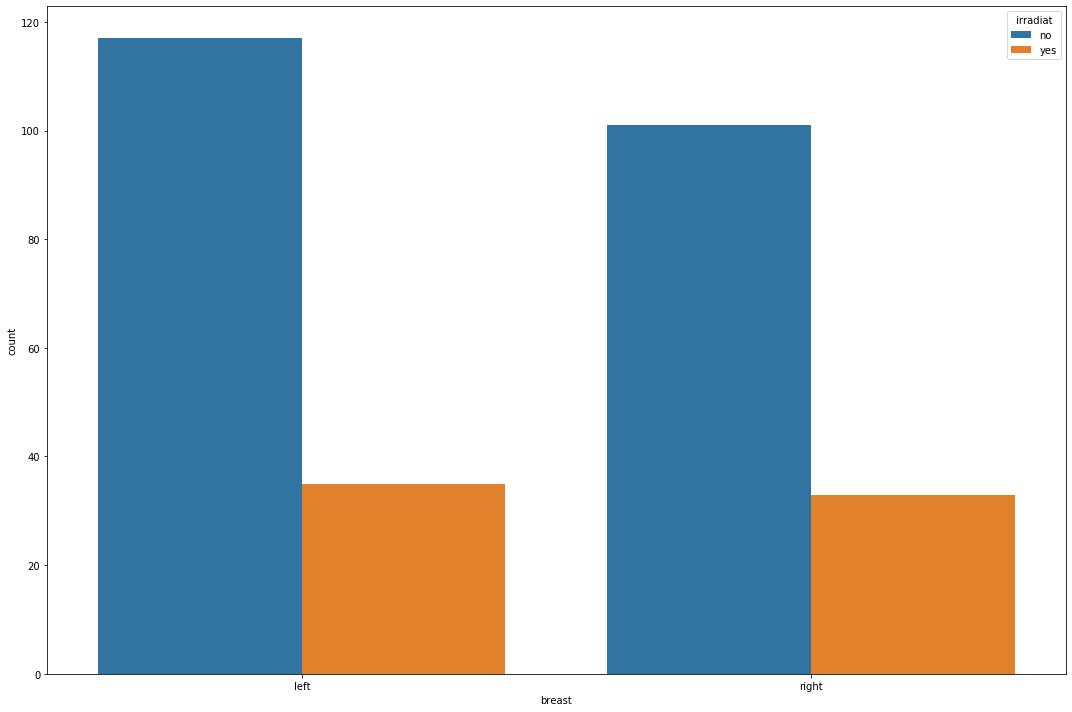

In [17]:
fig = plt.figure(figsize=(15,10))
sns.countplot('breast', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

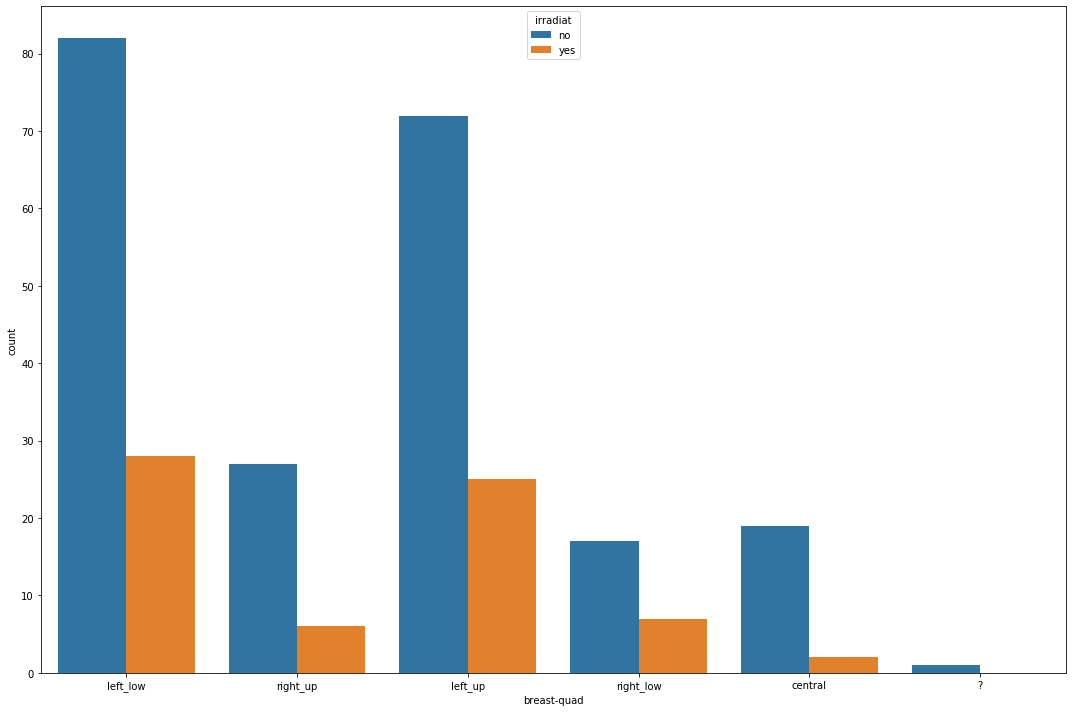

In [18]:
fig = plt.figure(figsize=(15,10))
sns.countplot('breast-quad', hue='irradiat', data=bdata)
plt.tight_layout()
plt.show()

In [19]:
## 2. DATA PREPROCESSING
#Missing Value Data
bdata.replace('?', np.nan, inplace=True)

In [20]:
bdata.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [21]:
#jumlah data missing value
bdata.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [22]:
#Mengecek Persentase dari Data yang missing value
(bdata.isnull().sum()/len(bdata)).to_frame('persentase missing')

,persentase missing
class,0.000000
age,0.000000
menopause,0.000000
tumor-size,0.000000
inv-nodes,0.000000
node-caps,0.027972
deg-malig,0.000000
breast,0.000000
breast-quad,0.003497
irradiat,0.000000


In [23]:
#mengganti missing value dengan modus
bdata['node-caps'].fillna(bdata['node-caps'].mode()[0], inplace=True)
bdata['breast-quad'].fillna(bdata['breast-quad'].mode()[0], inplace=True)

In [24]:
bdata.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [25]:
#jumlah data missing value
bdata.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [26]:
#Duplikat Data
duplicateRowsDF = bdata[bdata.duplicated()]
print("Tampilan Data Duplikat")
duplicateRowsDF = duplicateRowsDF.sort_values(by = list(bdata.columns))
#duplicateRowsDF['Count'] = duplicateRowsDF.counts()
print(duplicateRowsDF)
print('Jumlah Data duplikat = ',len(duplicateRowsDF))

Tampilan Data Duplikat
                    class    age menopause tumor-size inv-nodes node-caps  \
171  no-recurrence-events  30-39   premeno      15-19       0-2        no   
113  no-recurrence-events  40-49   premeno      10-14       0-2        no   
112  no-recurrence-events  40-49   premeno      20-24       0-2        no   
111  no-recurrence-events  50-59      ge40      15-19       0-2        no   
91   no-recurrence-events  50-59      ge40      20-24       0-2        no   
78   no-recurrence-events  50-59   premeno      25-29       0-2        no   
142  no-recurrence-events  60-69      ge40      10-14       0-2        no   
21   no-recurrence-events  60-69      ge40      15-19       0-2        no   
97   no-recurrence-events  60-69      ge40      15-19       0-2        no   
120  no-recurrence-events  60-69      ge40      20-24       0-2        no   
268     recurrence-events  30-39   premeno      35-39       0-2        no   
237     recurrence-events  40-49   premeno      25-29

In [27]:
#Label Encoding
#mengubah data categorical menjadi bentuk numerical data
label_encoder = preprocessing.LabelEncoder() 
bdata['class']= label_encoder.fit_transform(bdata['class'])
bdata['age']= label_encoder.fit_transform(bdata['age']) 
bdata['menopause']= label_encoder.fit_transform(bdata['menopause']) 
bdata['tumor-size']= label_encoder.fit_transform(bdata['tumor-size']) 
bdata['inv-nodes']= label_encoder.fit_transform(bdata['inv-nodes']) 
bdata['node-caps']= label_encoder.fit_transform(bdata['node-caps']) 
bdata['breast']= label_encoder.fit_transform(bdata['breast']) 
bdata['breast-quad']= label_encoder.fit_transform(bdata['breast-quad']) 
bdata['irradiat']= label_encoder.fit_transform(bdata['irradiat']) 
bdata.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0


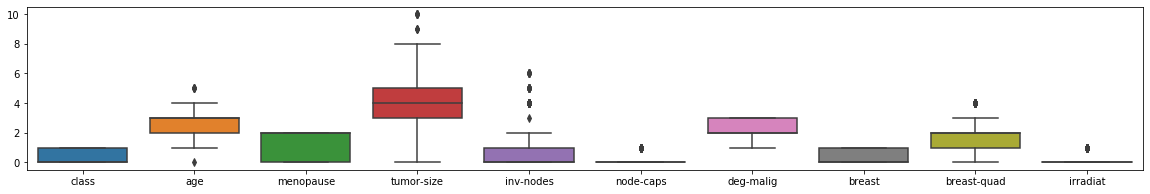

In [28]:
#Outlier
plt.figure(figsize=(20,3))
sns.boxplot(data = bdata)

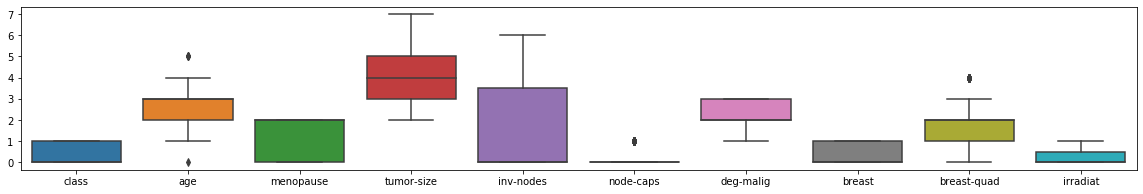

In [29]:
#menghilangkan outlier pada kolom tumor-size deangan teknik persentil
upper_limit = bdata['tumor-size'].quantile(.95)
lower_limit = bdata['tumor-size'].quantile(.05)

bdata = bdata[(bdata['tumor-size'] < upper_limit) & (bdata['tumor-size'] > lower_limit)]
bdata

#menampilkan boxplot kolom tumor-size setelah dihilangkan outliernya
plt.figure(figsize=(20,3))
sns.boxplot(data = bdata)

In [30]:
#Scalling Data
# sc = StandardScaler()
# bdata = pd.DataFrame(sc.fit_transform(bdata))
# hasilsc = sc.fit_transform(bdata)
# data = pd.DataFrame(hasilsc, columns=['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income' ])
# data

In [31]:
## 3. KLASIFIKASI
X = bdata.drop(columns=['irradiat'],axis=1)
y = bdata['irradiat']
X.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,2,5,0,0,3,0,1
1,0,2,2,3,0,0,2,1,4
2,0,2,2,3,0,0,2,0,1
3,0,4,0,2,0,0,2,1,2
5,0,4,0,2,0,0,2,0,1


In [32]:
#train data
#test data
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [33]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
prediksi_train = model.predict(X_train)
prediksi = model.predict(X_test)
Akurasi_train = accuracy_score(y_train,prediksi_train)*100
print(Akurasi_train)
Akurasi = accuracy_score(y_test,prediksi)*100
print(Akurasi)

79.25531914893617
63.829787234042556
